In [21]:
import networkx as nx
import matplotlib.pyplot as plt 


#### T1: ugraph #### 
def ugraph(V, C, E, W=None):

    G = nx.Graph()

    #função adicional do nx 1: add_edges_from 
        #na documentação está na parte de Graph Creation
    G.add_edges_from(E)

    for i, no in enumerate(V):

        #função adicional do nx 2: add_node
            #na documentação está na parte de Graph Creation
        G.add_node(no, pos=C[i])
    
    if W is not None:
        for i, edge in enumerate(E):
            G[edge[0]][edge[1]]['weight'] = W[i]
    
    pos = nx.get_node_attributes(G, 'pos')

    return G

#### T2: plot_ugraph + C1 ####
def plot_ugraph(G, weighted=False):

    nx.draw(G, pos=nx.get_node_attributes(G, 'pos'),
            with_labels=True, edge_color='skyblue',
            node_color='white', edgecolors='black', node_size=500)
    
    if weighted:

        E_label = nx.get_edge_attributes(G, 'weight')
        nx.draw_networkx_edge_labels(G, pos=nx.get_node_attributes(G, 'pos'), edge_labels=E_label, rotate=False)

#### T3: dijkstra (menor caminho) ####
def dijkstra(G, s, f=None):
    
    if f is None:

        paths = nx.single_source_dijkstra_path(G, s)
        edges = []
        
        for objt in paths:
            edges.extend(zip(paths[objt][:-1], paths[objt][1:]))
        return edges
    
    else:
        
        #função adicional do nx 3: dijkstra_path
            #na documentação está na parte de Shortest Paths
        paths = nx.dijkstra_path(G, s, f)
        edges = list(zip(paths[:-1], paths[1:]))
        return edges

#### T4: connected ####
def connected(G):

    #função adicional do nx 4: is_connected
        #na documentação está na parte de Connectivity
    b = nx.is_connected(G)
    return b

#### T5: bridge ####
def bridge(G, a):

    #função adicional do nx 5: bridges
        #na documentação está na parte de Connectivity
    b = a in nx.bridges(G)
    return b

#### T6: cycle ####
def cycle(G):

    try:
            
        #função adicional do nx 6: find_cycle
            #na documentação está na parte de Cycle Finding
        edges = nx.find_cycle(G)
        return edges
    
    except:
        return None

(-0.10500000000000001, 1.105, -0.10500000000000001, 1.105)

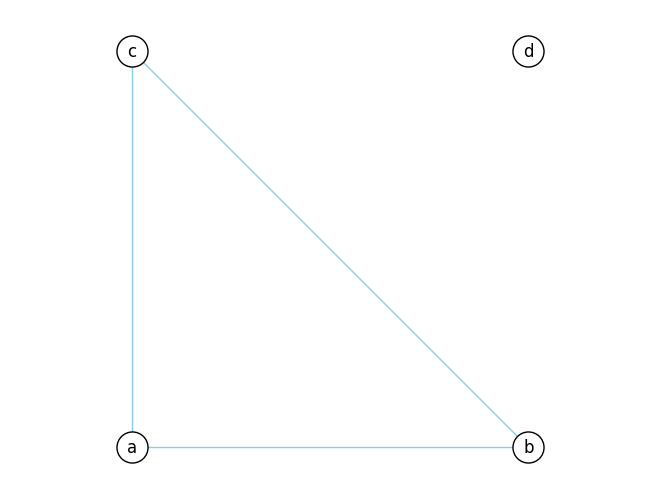

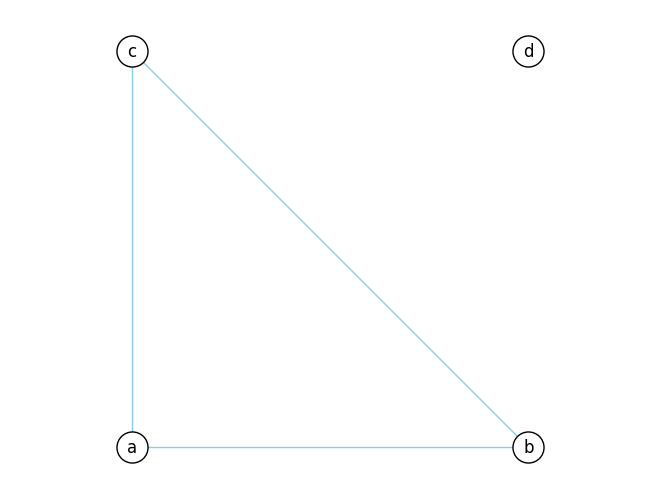

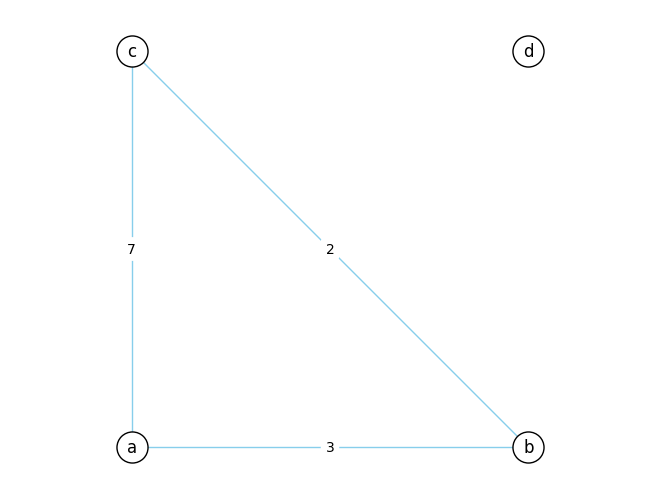

In [22]:
#### Rodando ####
V = ['a', 'b', 'c', 'd']
C = [(0, 0), (1, 0), (0, 1), (1, 1)]
E = [('b', 'a'), ('b', 'c'), ('a', 'c')]
W = [3, 2, 7]

#T1
G1 = ugraph(V, C, E) #sem peso
G2 = ugraph(V, C, E, W) #com peso

#T2
plt.figure()
plot_ugraph(G1)
plt.axis('equal')

plt.figure()
plot_ugraph(G2)
plt.axis('equal')

plt.figure()
plot_ugraph(G2, weighted=True)
plt.axis('equal')

(-0.10500000000000001, 1.105, -0.10500000000000001, 1.105)

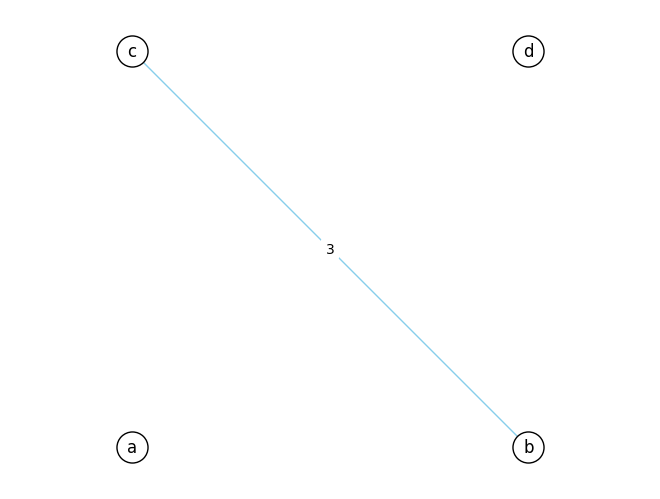

In [23]:
#T3
edges = dijkstra(G2, 'b', 'c')
G3 = ugraph(V, C, edges, W)

plt.figure()
plot_ugraph(G3, weighted=True)
plt.axis('equal')

In [24]:
#T4
b1 = connected(G1)
G1.add_edge('c', 'd')
b2 = connected(G1)

print('b1:', 'Conectado' if b1 else 'Não conectado')
print('b2:', 'Conectado' if b2 else 'Não conectado')

b1: Não conectado
b2: Conectado


In [25]:
#T5
b1 = bridge(G1, ('a', 'b'))
b2 = bridge(G1, ('c', 'd'))

print('b1:', 'É ponte' if b1 else 'Não é ponte')
print('b2:', 'É ponte' if b2 else 'Não é ponte')

b1: Não é ponte
b2: É ponte


Ciclo: [('b', 'a'), ('a', 'c'), ('c', 'b')]


(-0.10500000000000001, 1.105, -0.10500000000000001, 1.105)

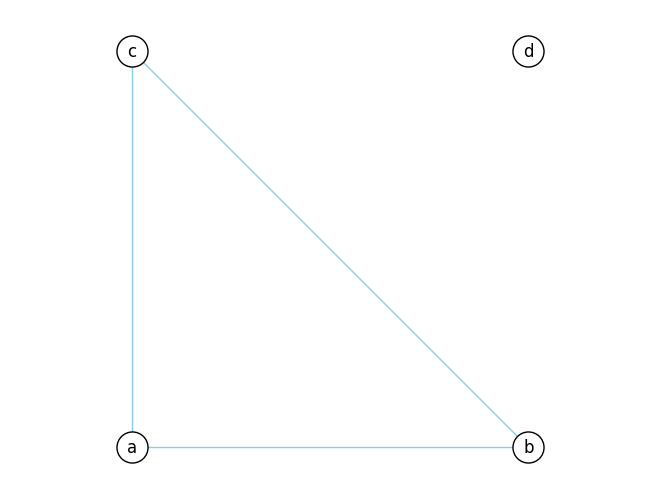

In [29]:
#T6
edges = cycle(G1)
G4 = ugraph(V, C, edges)

print('Ciclo:', edges)

plt.figure()
plot_ugraph(G4)
plt.axis('equal')